In [1]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the dataset
df = pd.read_csv(r"C:\Users\pssha\OneDrive\Desktop\dataset python final.csv")

In [9]:
df


,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0
...,...,...,...,...,...,...,...,...,...
453,Shelvin Mack,Utah Jazz,8,PG,26,06-Mar,203,Butler,2433333.0
454,Raul Neto,Utah Jazz,25,PG,24,06-Jan,179,NaN,900000.0
455,Tibor Pleiss,Utah Jazz,21,C,26,07-Mar,256,NaN,2900000.0
456,Jeff Withey,Utah Jazz,24,C,26,7-0,231,Kansas,947276.0


In [15]:
# Display the first few rows of the dataset
df.head()     

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,height
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0,173
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0,171
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN,170
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0,155
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0,158


      ----------- Preprocessing -----------

In [18]:
# Replace the "height" column with random values between 150 and 180
df["height"] = np.random.randint(150, 181, df.shape[0])

In [20]:
# Check for missing values and clean data if necessary
df.dropna(inplace=True)

In [22]:
# Ensure column names are consistent
df.columns = df.columns.str.strip().str.lower()

    ----------- Analysis Tasks -----------

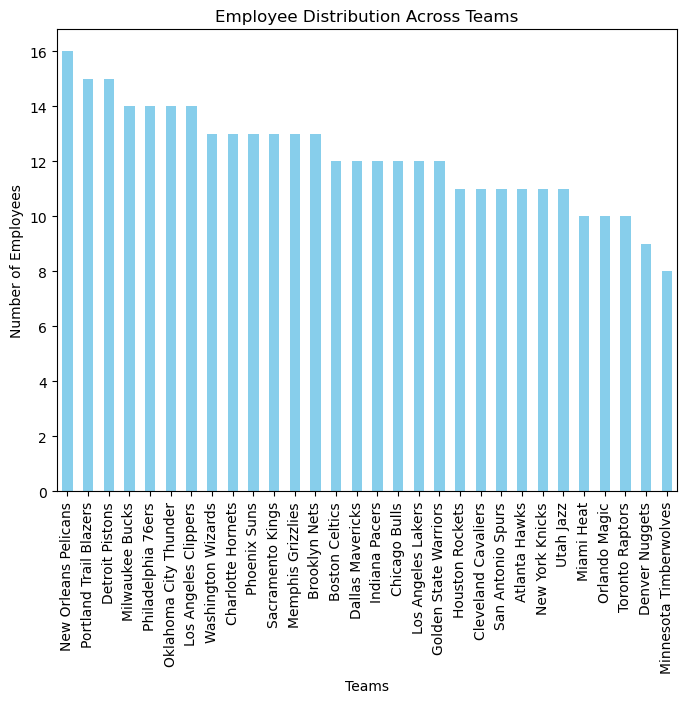


Employee Distribution Across Teams:
 team
New Orleans Pelicans      16
Portland Trail Blazers    15
Detroit Pistons           15
Milwaukee Bucks           14
Philadelphia 76ers        14
Oklahoma City Thunder     14
Los Angeles Clippers      14
Washington Wizards        13
Charlotte Hornets         13
Phoenix Suns              13
Sacramento Kings          13
Memphis Grizzlies         13
Brooklyn Nets             13
Boston Celtics            12
Dallas Mavericks          12
Indiana Pacers            12
Chicago Bulls             12
Los Angeles Lakers        12
Golden State Warriors     12
Houston Rockets           11
Cleveland Cavaliers       11
San Antonio Spurs         11
Atlanta Hawks             11
New York Knicks           11
Utah Jazz                 11
Miami Heat                10
Orlando Magic             10
Toronto Raptors           10
Denver Nuggets             9
Minnesota Timberwolves     8
Name: count, dtype: int64

Percentage Split:
 team
New Orleans Pelicans      4.383562
P

In [24]:
# 1. Distribution of employees across each team
team_distribution = df["team"].value_counts()
team_percentage = (team_distribution / len(df)) * 100

plt.figure(figsize=(8, 6))
team_distribution.plot(kind="bar", color="skyblue")
plt.title("Employee Distribution Across Teams")
plt.xlabel("Teams")
plt.ylabel("Number of Employees")
plt.xticks(rotation=90)
plt.show()

print("\nEmployee Distribution Across Teams:\n", team_distribution)
print("\nPercentage Split:\n", team_percentage)

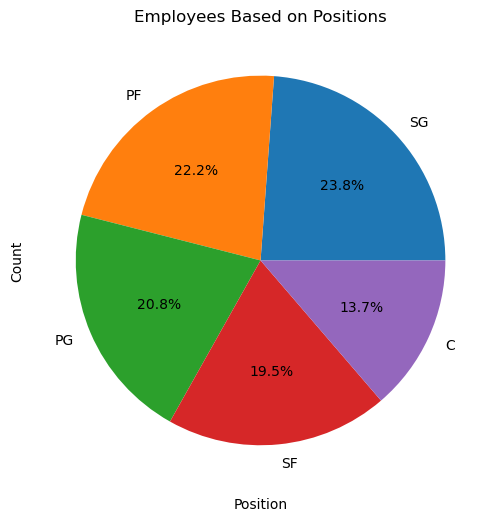


Employee Distribution Across Positions:
 position
SG    87
PF    81
PG    76
SF    71
C     50
Name: count, dtype: int64


In [26]:
# 2. Segregate employees based on their positions
position_distribution = df["position"].value_counts()

plt.figure(figsize=(8, 6))
position_distribution.plot(kind="pie",autopct='%1.1f%%', color="orange")
plt.title("Employees Based on Positions")
plt.xlabel("Position")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

print("\nEmployee Distribution Across Positions:\n", position_distribution)

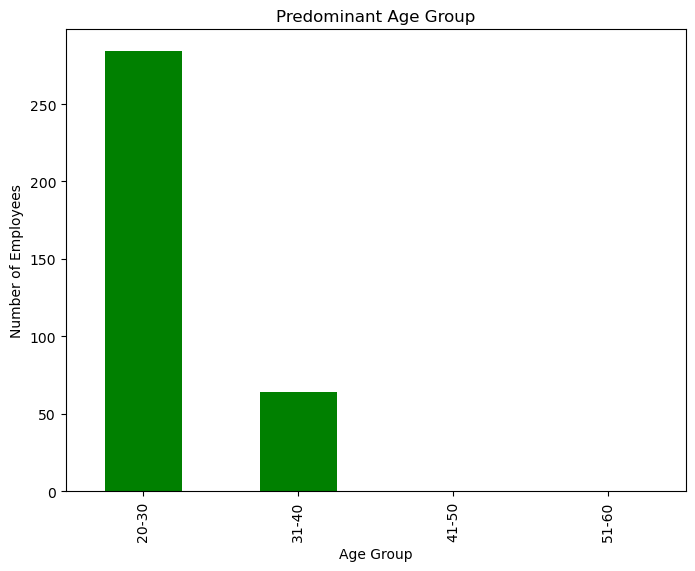


Age Group Distribution:
 age_group
20-30    284
31-40     64
41-50      0
51-60      0
Name: count, dtype: int64


In [28]:
# 3. Identify the predominant age group
df["age_group"] = pd.cut(df["age"], bins=[20, 30, 40, 50, 60], labels=["20-30", "31-40", "41-50", "51-60"])
age_group_distribution = df["age_group"].value_counts()

plt.figure(figsize=(8, 6))
age_group_distribution.plot(kind="bar", color="green")
plt.title("Predominant Age Group")
plt.xlabel("Age Group")
plt.ylabel("Number of Employees")
plt.show()

print("\nAge Group Distribution:\n", age_group_distribution)

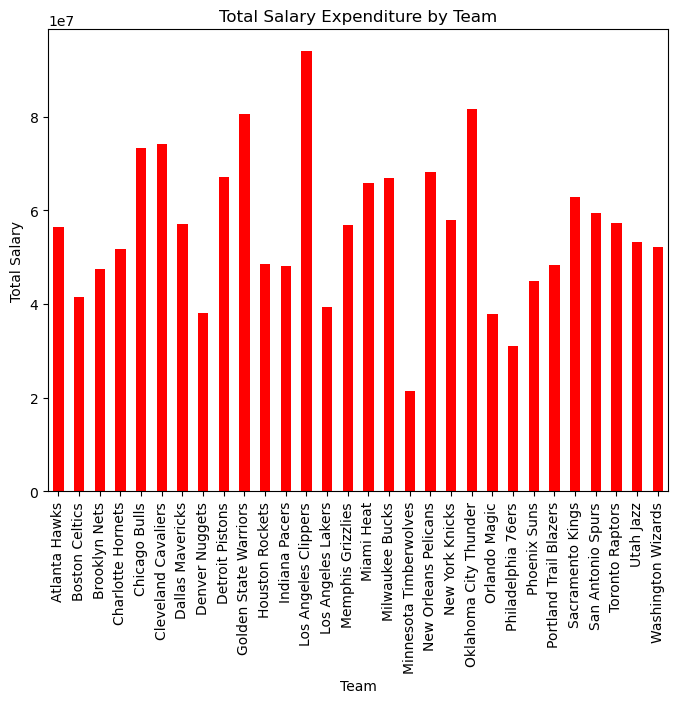

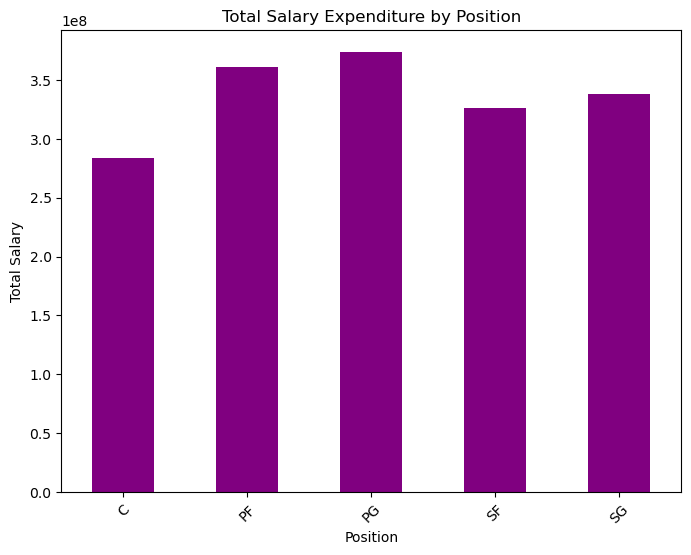


Team Salary Expenditure:
 team
Atlanta Hawks             56383300.0
Boston Celtics            41541068.0
Brooklyn Nets             47503125.0
Charlotte Hornets         51715614.0
Chicago Bulls             73265800.0
Cleveland Cavaliers       74068189.0
Dallas Mavericks          57140305.0
Denver Nuggets            38167971.0
Detroit Pistons           67168263.0
Golden State Warriors     80535517.0
Houston Rockets           48445456.0
Indiana Pacers            48057601.0
Los Angeles Clippers      93906914.0
Los Angeles Lakers        39245338.0
Memphis Grizzlies         56862880.0
Miami Heat                65838121.0
Milwaukee Bucks           66794557.0
Minnesota Timberwolves    21310196.0
New Orleans Pelicans      68200408.0
New York Knicks           57977202.0
Oklahoma City Thunder     81515298.0
Orlando Magic             37887288.0
Philadelphia 76ers        30992894.0
Phoenix Suns              44945135.0
Portland Trail Blazers    48301818.0
Sacramento Kings          62786874.0
San An

In [30]:
# 4. Identify the team and position with the highest salary expenditure
team_salary = df.groupby("team")["salary"].sum()
position_salary = df.groupby("position")["salary"].sum()

plt.figure(figsize=(8, 6))
team_salary.plot(kind="bar", color="red")
plt.title("Total Salary Expenditure by Team")
plt.xlabel("Team")
plt.ylabel("Total Salary")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(8, 6))
position_salary.plot(kind="bar", color="purple")
plt.title("Total Salary Expenditure by Position")
plt.xlabel("Position")
plt.ylabel("Total Salary")
plt.xticks(rotation=45)
plt.show()

print("\nTeam Salary Expenditure:\n", team_salary)
print("\nPosition Salary Expenditure:\n", position_salary)

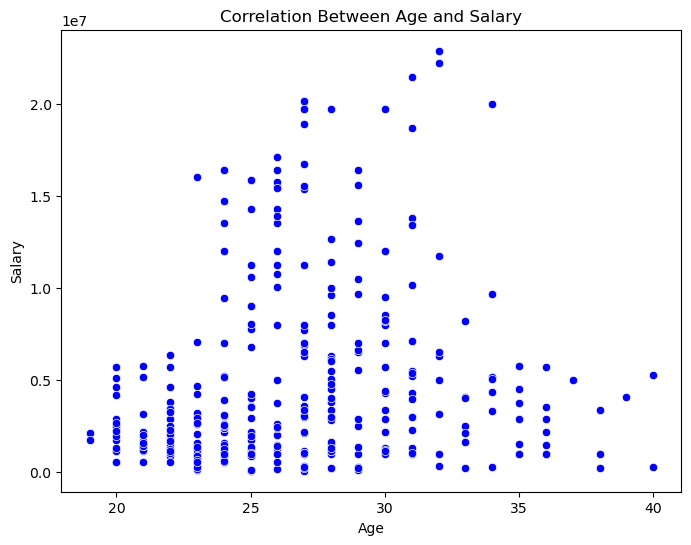


Correlation between Age and Salary:  0.15999189342806172


In [32]:
# 5. Correlation between Age and Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["age"], y=df["salary"], color="blue")
plt.title("Correlation Between Age and Salary")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.show()

correlation = df["age"].corr(df["salary"])
print("\nCorrelation between Age and Salary: ", correlation)

In [ ]:
     ----------- Insights -----------

In [34]:
print("\nKey Insights:")
print("1. The most common team is:", team_distribution.idxmax())
print("2. The most common position is:", position_distribution.idxmax())
print("3. The predominant age group is:", age_group_distribution.idxmax())
print("4. The team with the highest salary expenditure is:", team_salary.idxmax())
print("5. The position with the highest salary expenditure is:", position_salary.idxmax())
print("6. Correlation between age and salary:", round(correlation, 2))


Key Insights:
1. The most common team is: New Orleans Pelicans
2. The most common position is: SG
3. The predominant age group is: 20-30
4. The team with the highest salary expenditure is: Los Angeles Clippers
5. The position with the highest salary expenditure is: PG
6. Correlation between age and salary: 0.16
